In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

Using TensorFlow backend.


# Import Data

In [2]:
def import_data(path):
    
    data = pd.read_csv(path, sep=",")
    data = data.drop([2,3,4,5], axis = 0)
    return data

data = import_data('Gluten-Starch-NIR.txt')

# Wrangle

In [3]:
def clean_data(data):
    
    # define input and output vectors
    y = data["Starch"].astype(float).values    
    X = data.drop(['Unnamed: 0', 'Starch', 'Y,Gluten'] , axis = 1).values
    
    # scale and reshape dataset
    y = np.reshape(y, (-1,1))
    scaler_X = MinMaxScaler()
    scaler_X.fit(X)
    X = scaler_X.transform(X)
    
    # test and training set
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = clean_data(data)

# Set Up Model

In [4]:
def define_model_sequential():
    
    model = Sequential()
    model.add(Dense(1000, input_dim = X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(800, activation = 'relu'))
    model.add(Dense(800, activation = 'relu'))
    model.add(Dense(80, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'mse', optimizer = 'adam')
    
    return model

model = define_model_sequential()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               800800    
_________________________________________________________________
dense_3 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_4 (Dense)              (None, 80)                64080     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 81        
Total params: 1,606,761
Trainable params: 1,606,761
Non-trainable params: 0
_________________________________________________________________


# Fit Model

In [6]:
def fit_model(model, X_train, y_train, verbose = 0):
    
    history = model.fit(X_train, y_train, epochs=400, batch_size=10,  verbose=verbose)
    
    return model, history

model = define_model_sequential()
model, history = fit_model(model, X_train, y_train)

Instructions for updating:
Use tf.cast instead.


# Predict Values

In [7]:
y_test_pred = model.predict(X_test)

# Calculate Results

In [8]:
def calc_results(y_test,y_test_pred):
    
    class results:
        
        def __init__(self):
            self.error = np.mean(abs(y_test_pred - y_test) / np.mean(y_test))
            self.error_list = abs(y_test_pred - y_test) / np.mean(y_test)
            self.mse = mse(y_test, y_test_pred)
            self.rmse = np.sqrt(self.mse)
    
    return results()

results = calc_results(y_test,y_test_pred)

# Display Results

In [13]:
print("Error: %.2f" % (results.error*100))

Error: 1.47


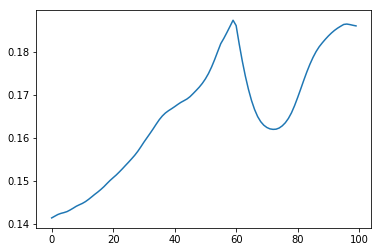

In [14]:
plt.plot(X_train[66])
plt.show()

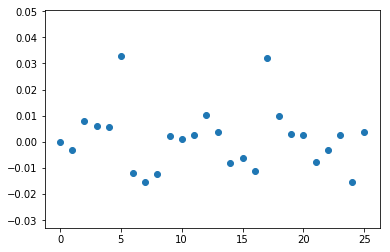

In [16]:
plt.scatter(np.arange(y_test_pred.shape[0]),y_test_pred - y_test)
plt.show()

# All Together

Error: 3.02
MSE 0.00
RMSE 0.02


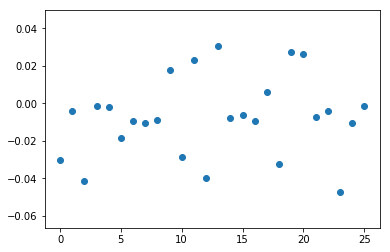

In [18]:
model = define_model_sequential()
model, history = fit_model(model, X_train, y_train)
y_test_pred = model.predict(X_test)
results = calc_results(y_test,y_test_pred)
print("Error: %.2f" % (results.error*100))
print("MSE %.2f" % (results.mse))
print("RMSE %.2f" % (np.sqrt(results.mse)))
plt.scatter(np.arange(y_test_pred.shape[0]),y_test_pred - y_test)
plt.show()